In [2]:
import pandas
D=pandas.read_table('DATA.txt',header=0)
print(D.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9394 entries, 0 to 9393
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   9394 non-null   int64  
 1   Day     9394 non-null   int64  
 2   Hour    9394 non-null   int64  
 3   PAC     9394 non-null   float64
 4   Tm      9394 non-null   float64
 5   Eff     9394 non-null   float64
 6   Tamb    9394 non-null   float64
 7   RH      9394 non-null   float64
 8   P       9394 non-null   float64
 9   WS      9394 non-null   float64
 10  WD      9394 non-null   float64
 11  TOA     9394 non-null   float64
 12  GHI     9394 non-null   float64
 13  BHI     9394 non-null   float64
 14  DHI     9394 non-null   float64
 15  BNI     9394 non-null   float64
dtypes: float64(13), int64(3)
memory usage: 1.1 MB
None


In [3]:
Y=D.PAC
X=D.drop('PAC',axis=1)
X

,Month,Day,Hour,Tm,Eff,Tamb,RH,P,WS,WD,TOA,GHI,BHI,DHI,BNI
0,1,1,10,42.347879,98.894697,14.50,58.81,1017.53,3.15,203.14,6181.305,4278.672,3391.175,887.496,7709.750
1,1,1,11,55.044545,98.122879,15.98,54.94,1017.73,2.11,226.10,7261.285,5195.536,4223.724,971.812,8186.512
2,1,1,12,67.297576,98.311212,17.46,50.24,1017.30,1.52,263.35,7637.228,5525.204,4534.102,991.102,8357.933
3,1,1,13,77.016667,98.223939,18.24,48.56,1016.64,1.66,292.72,7283.514,5236.036,4280.465,955.572,8271.674
4,1,1,14,80.223030,98.381667,18.45,48.91,1016.31,2.01,311.29,6224.230,4346.761,3473.797,872.963,7844.699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9389,9,9,5,0.000000,0.000000,18.98,86.72,1004.50,2.88,23.60,0.000,0.000,0.000,0.000,0.000
9390,9,9,6,0.000000,0.000000,18.86,87.56,1004.36,2.52,28.24,988.004,381.361,166.848,214.513,1231.764
9391,9,9,7,33.500000,67.366667,19.18,85.72,1004.57,2.09,29.66,3795.045,2197.232,1491.042,706.190,5127.925
9392,9,9,8,48.516667,99.066515,20.69,77.04,1004.94,2.18,23.28,6434.609,4266.431,3298.625,967.806,6848.822


In [4]:
import sklearn
from sklearn import model_selection
XTrain,XTest,yTrain,yTest=model_selection.train_test_split(X,Y,test_size=2348,random_state=100)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(XTrain,yTrain)

LinearRegression()

In [6]:
print (model.intercept_)
print(model.coef_)

-7293.540765534424
[ 1.37476689e+01 -9.19421654e-01 -1.07688218e+02  9.46750168e+01
 -3.19933486e+01 -1.12623922e+02 -1.40269196e+01  1.02960391e+01
  4.00421059e+01 -3.15413795e-01  4.41703225e-02  6.90591497e+00
 -6.85112258e+00 -6.65400779e+00  1.51546211e-01]


In [7]:
import sklearn.metrics as metrics
rsq=metrics.r2_score(yTrain,model.predict(XTrain))
print(f"coefficient de determination R**2 en apprentissage (train):{rsq:.2f}")

coefficient de determination R**2 en apprentissage (train):0.90


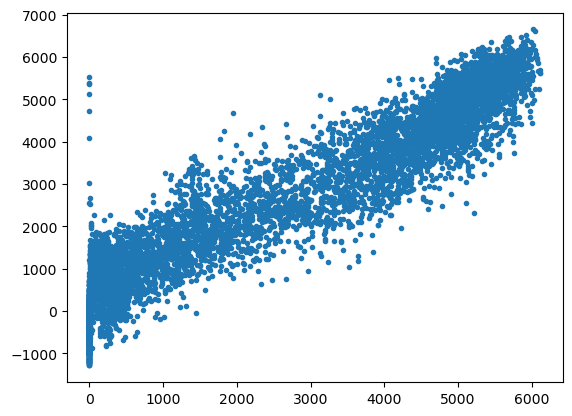

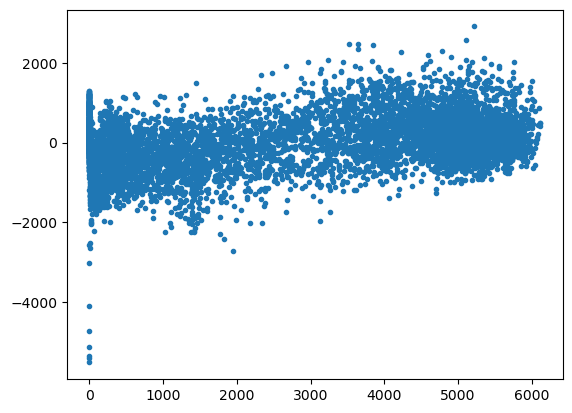

In [8]:
import matplotlib.pyplot as plt
plt.plot(yTrain,model.predict(XTrain),'.')
plt.show()

plt.plot(yTrain,yTrain-model.predict(XTrain),'.')
plt.show()

In [17]:
import sklearn.metrics as metrics
rsq=metrics.r2_score(yTest,model.predict(XTest))
print(f"coefficient de determination R**2 en apprentissage (train):{rsq:.2f}")

coefficient de determination R**2 en apprentissage (train):0.98


In [9]:
import numpy as np


mse = np.mean(rsq)

# Calculez la racine carrée de la MSE pour obtenir le RMSE.
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.9480892073858305


In [10]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=10,random_state=10,bootstrap=True)

In [11]:
model.fit(XTrain,yTrain)

RandomForestRegressor(n_estimators=10, random_state=10)

In [12]:
import sklearn.metrics as metrics
rsq=metrics.r2_score(yTrain,model.predict(XTrain))
print(rsq)

0.9952546525103281


C:\Users\pc\AppData\Local\Temp\ipykernel_18616\2732707723.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(yTest,hist=False,color='r',label='Actual Value')
C:\Users\pc\AppData\Local\Temp\ipykernel_18616\2732707723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model

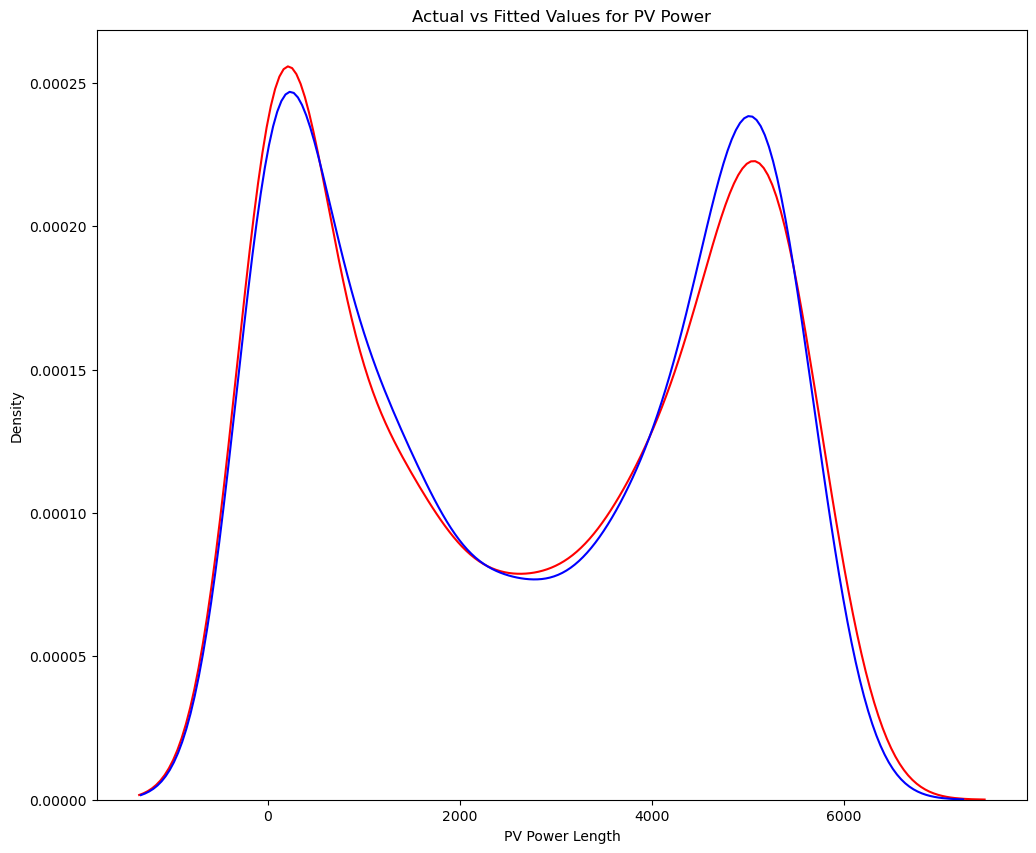

In [13]:
import seaborn as sns
width=12
height=10
plt.figure(figsize=(width,height))
ax1=sns.distplot(yTest,hist=False,color='r',label='Actual Value')
sns.distplot(model.predict(XTest),hist=False,color='b',label='Fitted Values',ax=ax1)
plt.title('Actual vs Fitted Values for PV Power')
plt.xlabel('PV Power Length')
plt.show ()
plt.close()

C:\Users\pc\AppData\Local\Temp\ipykernel_18616\268074569.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(yTrain,hist=False,color='r',label='Actual Value')
C:\Users\pc\AppData\Local\Temp\ipykernel_18616\268074569.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.

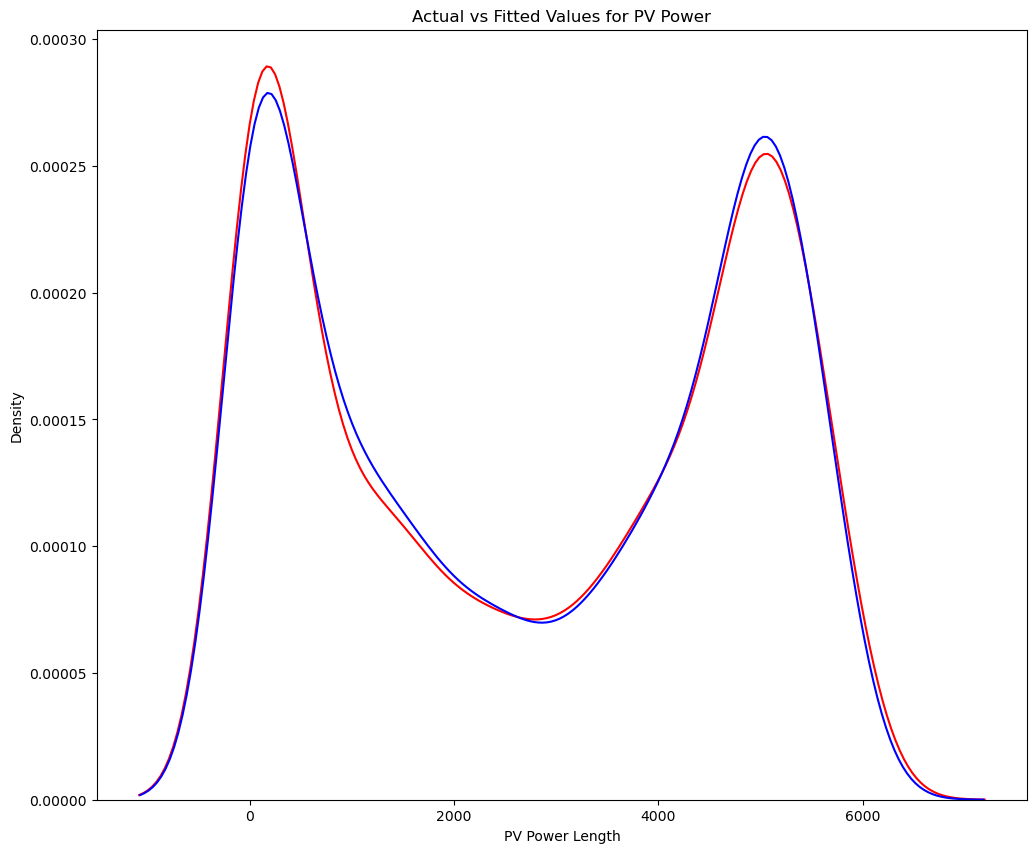

In [14]:
import seaborn as sns
width=12
height=10
plt.figure(figsize=(width,height))
ax1=sns.distplot(yTrain,hist=False,color='r',label='Actual Value')
sns.distplot(model.predict(XTrain),hist=False,color='b',label='Fitted Values',ax=ax1)
plt.title('Actual vs Fitted Values for PV Power')
plt.xlabel('PV Power Length')
plt.show ()
plt.close()

In [15]:
pandas.DataFrame(model.feature_importances_,
                 index = XTrain.columns,
                 columns = ['importance']).sort_values('importance',ascending = False)

,importance
BHI,0.554609
Tm,0.173974
Eff,0.115231
GHI,0.067037
DHI,0.029424
Hour,0.023992
BNI,0.008898
Month,0.007571
Tamb,0.006209
TOA,0.004551


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
parameters = {'n_estimators' : [10,50,100,200,300]}
regr=RandomForestRegressor(random_state=10,bootstrap = True)
model= GridSearchCV(regr,parameters)
model.fit(XTrain,yTrain)

GridSearchCV(estimator=RandomForestRegressor(random_state=10),
             param_grid={'n_estimators': [10, 50, 100, 200, 300]})